<a href="https://colab.research.google.com/github/AyushSonuu/credit-card-default-ML-classification-capstone/blob/main/Copy_of_Credit_Card_Default_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Predicting whether a customer will default on his/her credit card </u></b>

## <b> Problem Description </b>

### This project is aimed at predicting the case of customers default payments in Taiwan. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. We can use the [K-S chart](https://www.listendata.com/2019/07/KS-Statistics-Python.html) to evaluate which customers will default on their credit card payments


## <b> Data Description </b>

### <b>Attribute Information: </b>

### This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:
* ### X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
* ### X2: Gender (1 = male; 2 = female).
* ### X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
* ### X4: Marital status (1 = married; 2 = single; 3 = others).
* ### X5: Age (year).
* ### X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
* ### X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.
* ### X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

In [1]:
# pd.read_excell not supoorting error was to update xlrd package and pandas so this does the same

print("please restart the runtime and run all after this")# note 
!pip install matplotlib
!pip install xlrd==2.0.1
!pip install pandas==1.5.2

please restart the runtime and run all after this
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 96 kB 2.9 MB/s 
  Attempting uninstall: xlrd
    Found existing installation: xlrd 1.2.0
    Uninstalling xlrd-1.2.0:
      Successfully uninstalled xlrd-1.2.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 12.2 MB 4.9 MB/s 
  Attempting uninstall: pandas
    Found existing installation: pandas 1.3.5
    Uninstalling pandas-1.3.5:
      Successfully uninstalled pandas-1.3.5


In [2]:
# mounting drive to load the data from the drive effectively
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xlrd
import warnings
warnings.filterwarnings("ignore")

In [4]:
# loading the dataset into colab and making the header as 1 beacause the original columns are at header =1
df = pd.read_excel(r"/content/drive/MyDrive/supervised-ml-classification-capstone-Ayush/Copy of default of credit card clients.xls",engine="xlrd",header=1)

In [5]:
df_fe = df.copy()

In [6]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [7]:
# lets get the basic info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [8]:
# basic understanding aboout dataset generally min max mean mode etc
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [9]:
#first we will check for null values
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

 **Exploratory Data Analysis**


 Univariate, Bivariate and multivariate Analysis

In [10]:
# dependentd variable
df["default payment next month"].value_counts()

0    23364
1     6636
Name: default payment next month, dtype: int64

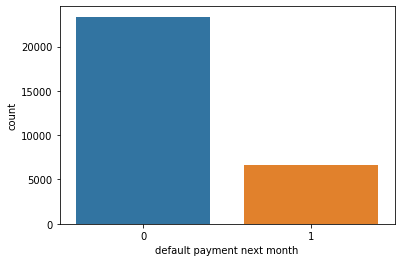

In [11]:
sns.countplot(data = df,x="default payment next month") # we can see here our dataset is imbalanced
plt.show()

In [12]:
# independent variables analysis first go for all the categorical type variables
# SEX : 1 = male; 2 = female
# education : 1 = graduate school; 2 = university; 3 = high school; 4 = others
# Marital status : (1 = married; 2 = single; 3 = others).
categorical_features = ['SEX', 'EDUCATION', 'MARRIAGE'] 
for col in categorical_features:
  print(df[col].value_counts(),"\n")

2    18112
1    11888
Name: SEX, dtype: int64 

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64 

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64 



In [13]:
# In education and marriage column we have unexpeced values so first we need to fix them
df.loc[(df["EDUCATION"]==5) | (df["EDUCATION"]==6) | (df["EDUCATION"]==0),"EDUCATION"] = 4

In [14]:
df.loc[(df["MARRIAGE"]==0),"MARRIAGE"] = 3 # moving 0 category to 3

In [15]:
clean_df = df.copy()

In [16]:
# replacing the values of categories to do further one hot encoding
cat_replace_dict = {'SEX': {1 : 'MALE', 2 : 'FEMALE'}, 
                   'EDUCATION' : {1 : 'graduate school', 2 : 'university', 3 : 'high school', 4 : 'others'}, 
                   'MARRIAGE' : {1 : 'married', 2 : 'single', 3 : 'others'}}
df = df.replace(cat_replace_dict)

In [17]:
# function to plot categorical variables

def graph_ploting(variable_name,df):
  '''plots bar graph for all the categorical variables'''
  f = df[variable_name].value_counts()
  print(f)
  fig = plt.figure(figsize = (5,5))
  ax = fig.gca()
  plt.pie(f,autopct='%.2f')
  ax.set_title(f"{variable_name} vs count")
  plt.show()


FEMALE    18112
MALE      11888
Name: SEX, dtype: int64


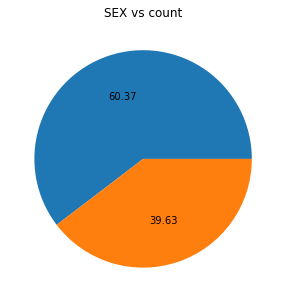

university         14030
graduate school    10585
high school         4917
others               468
Name: EDUCATION, dtype: int64


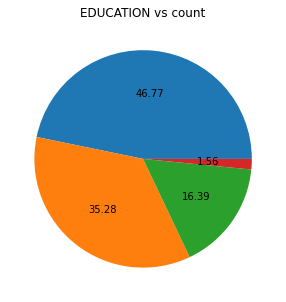

single     15964
married    13659
others       377
Name: MARRIAGE, dtype: int64


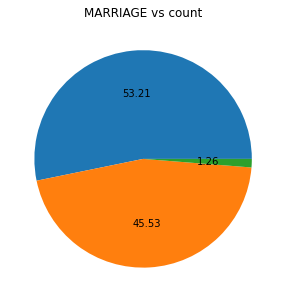

In [18]:
for col in categorical_features:
  graph_ploting(col,df)



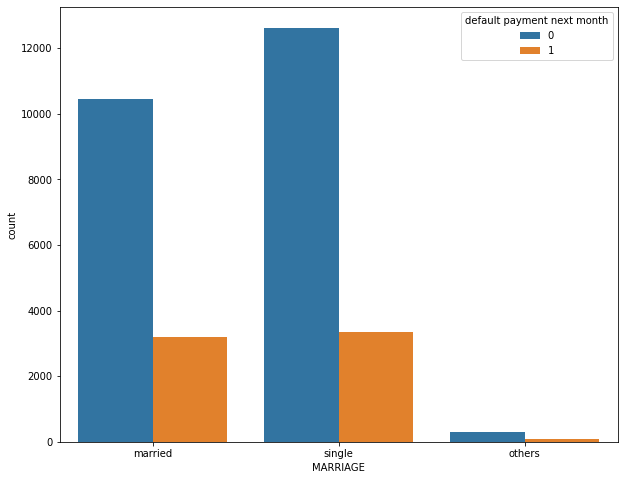

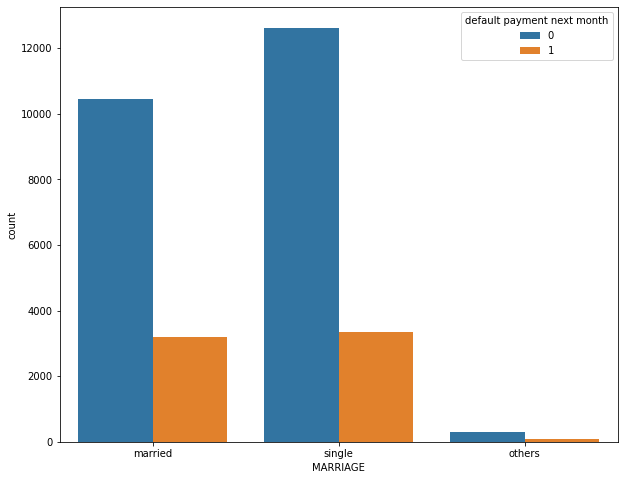

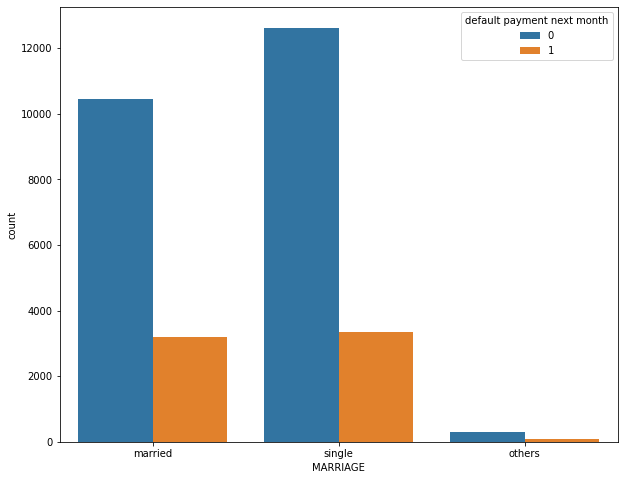

In [19]:
for i in categorical_features:
  fig = plt.figure(figsize=(10,8))
  ax= fig.gca()
  sns.countplot(x=col,hue="default payment next month",data=df)

In [20]:
df.shape

(30000, 25)

In [21]:
# renaming columns for better understanding
pay_var = {'PAY_0':'PAY_SEPT','PAY_2':'PAY_AUG','PAY_3':'PAY_JUL','PAY_4':'PAY_JUN','PAY_5':'PAY_MAY','PAY_6':'PAY_APR'}
bill_amount = {'BILL_AMT1':'BILL_AMT_SEPT','BILL_AMT2':'BILL_AMT_AUG','BILL_AMT3':'BILL_AMT_JUL','BILL_AMT4':'BILL_AMT_JUN','BILL_AMT5':'BILL_AMT_MAY','BILL_AMT6':'BILL_AMT_APR'}
amount_paid = {'PAY_AMT1':'PAY_AMT_SEPT','PAY_AMT2':'PAY_AMT_AUG','PAY_AMT3':'PAY_AMT_JUL','PAY_AMT4':'PAY_AMT_JUN','PAY_AMT5':'PAY_AMT_MAY','PAY_AMT6':'PAY_AMT_APR'}
df = df.rename(columns=pay_var)
df = df.rename(columns=bill_amount )
df = df.rename(columns=amount_paid)

In [22]:
# all numerical variables now 
numerical_features = [i for i in df.describe().columns]

1000000
10000
167484.32266666667


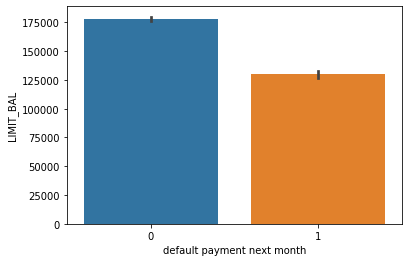

In [23]:
# lets check distribution of all numerical features
#limit balance
print(df["LIMIT_BAL"].max())
print(df["LIMIT_BAL"].min())
print(df["LIMIT_BAL"].mean())
sns.barplot(y="LIMIT_BAL", x = "default payment next month", data = df)
plt.show()

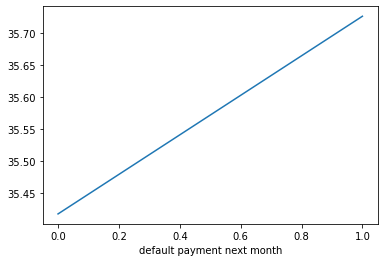

In [24]:
# age
df.groupby("default payment next month")["AGE"].mean().plot()
plt.show

In [25]:
# amount paid 
amount_paid_df = df[['PAY_AMT_SEPT','PAY_AMT_AUG','PAY_AMT_JUL','PAY_AMT_JUN','PAY_AMT_MAY','PAY_AMT_APR']]

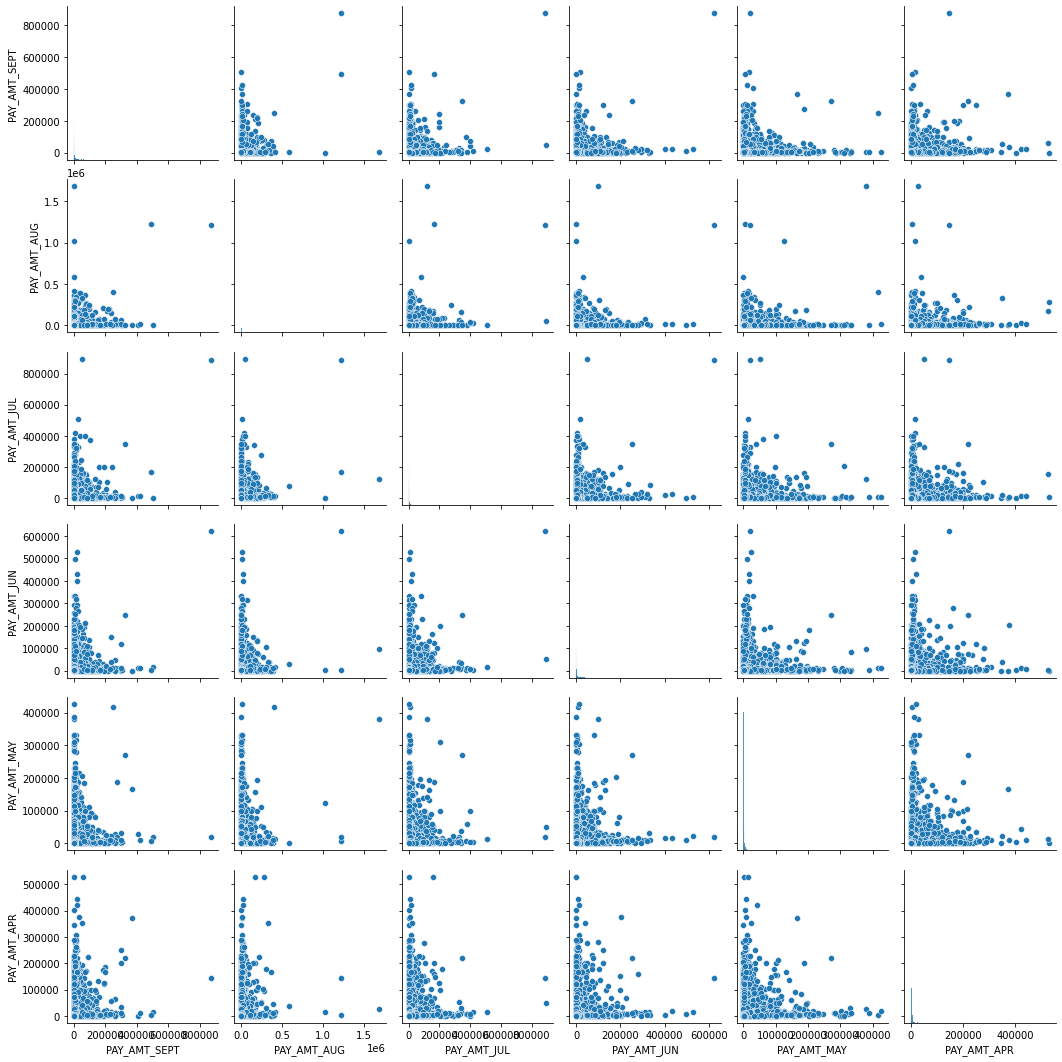

In [26]:
sns.pairplot(data=amount_paid_df)

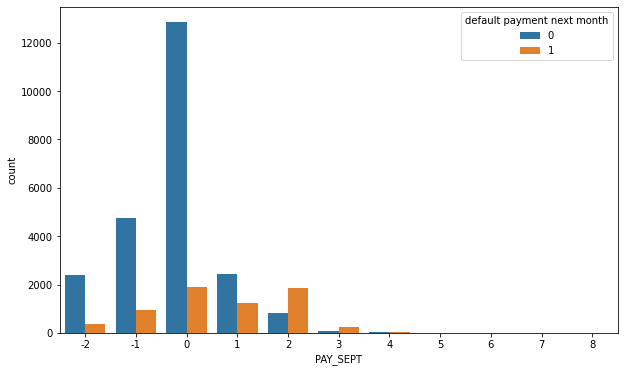

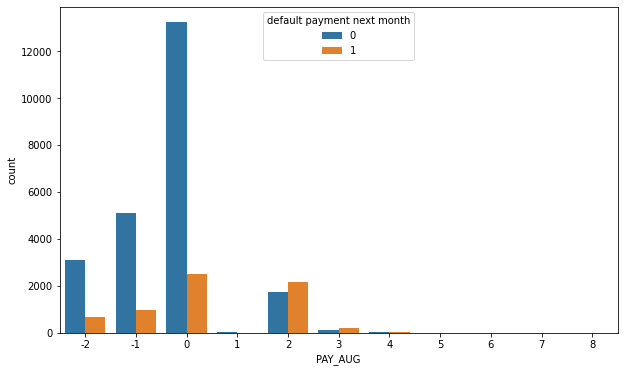

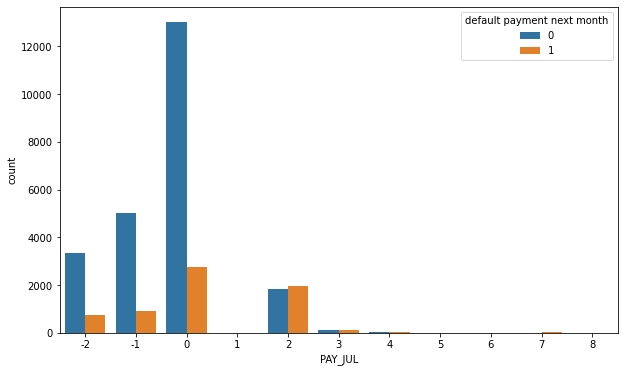

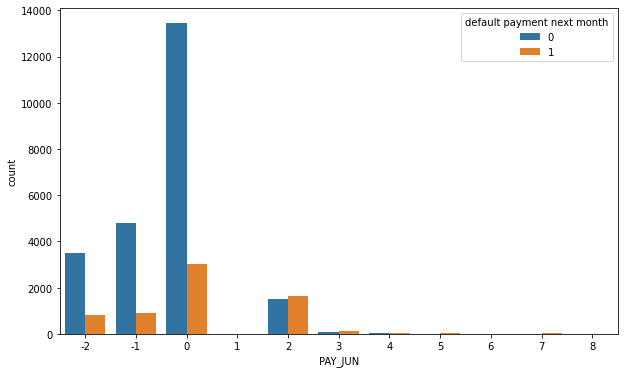

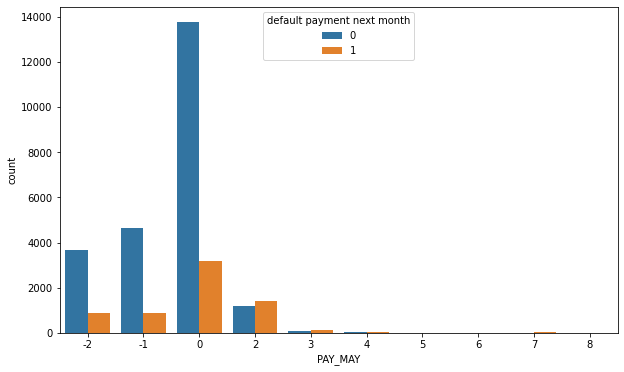

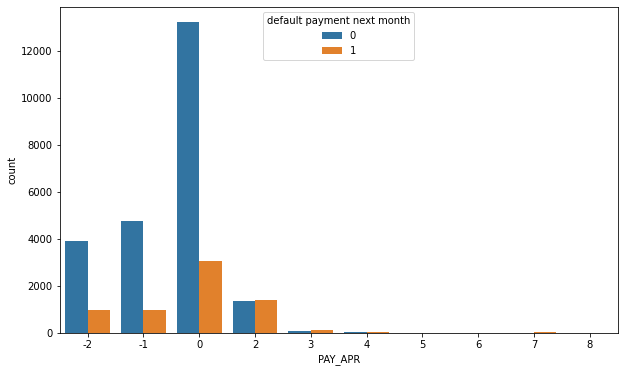

In [27]:
# analyzing pay status 
paid_status = ['PAY_SEPT','PAY_AUG','PAY_JUL','PAY_JUN','PAY_MAY','PAY_APR']
for col in paid_status:
  plt.figure(figsize=(10,6))
  sns.countplot(x = col, hue = 'default payment next month', data = df)


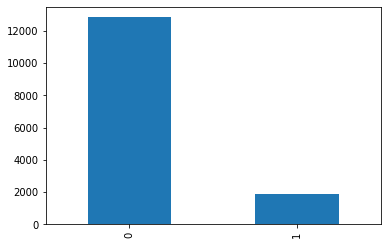

In [28]:
df[df["PAY_SEPT"]==0]['default payment next month'].value_counts().plot(kind="bar")



In [29]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,...,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,default payment next month
0,1,20000,FEMALE,university,married,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,FEMALE,university,single,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,FEMALE,university,single,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,FEMALE,university,married,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,MALE,university,married,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [30]:
# as our dataset is very much imbalanced we should balance our dataset
# iam using SMOTE
from imblearn.over_sampling import SMOTE

In [31]:
smote = SMOTE()
x_smote , y_smote = smote.fit_resample(clean_df.iloc[:,:-1],clean_df["default payment next month"])


In [32]:
x_smote.shape # after resampling we got some fair distribution

(46728, 24)

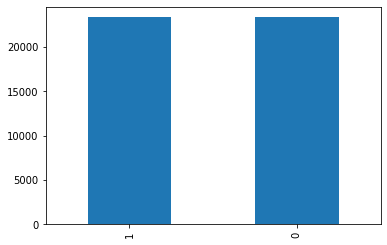

In [33]:
y_smote.value_counts().plot(kind="bar") # now our dataset is balanced

In [34]:
resample_df = pd.DataFrame(x_smote) 
pay_var = {'PAY_0':'PAY_SEPT','PAY_2':'PAY_AUG','PAY_3':'PAY_JUL','PAY_4':'PAY_JUN','PAY_5':'PAY_MAY','PAY_6':'PAY_APR'}
bill_amount = {'BILL_AMT1':'BILL_AMT_SEPT','BILL_AMT2':'BILL_AMT_AUG','BILL_AMT3':'BILL_AMT_JUL','BILL_AMT4':'BILL_AMT_JUN','BILL_AMT5':'BILL_AMT_MAY','BILL_AMT6':'BILL_AMT_APR'}
amount_paid = {'PAY_AMT1':'PAY_AMT_SEPT','PAY_AMT2':'PAY_AMT_AUG','PAY_AMT3':'PAY_AMT_JUL','PAY_AMT4':'PAY_AMT_JUN','PAY_AMT5':'PAY_AMT_MAY','PAY_AMT6':'PAY_AMT_APR'}
resample_df = resample_df.rename(columns=pay_var)
resample_df = resample_df.rename(columns=bill_amount )
resample_df = resample_df.rename(columns=amount_paid)

In [35]:
resample_df.shape

(46728, 24)

In [36]:
resample_df["default payment next month"] = y_smote

In [37]:
resample_df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_SEPT                      0
PAY_AUG                       0
PAY_JUL                       0
PAY_JUN                       0
PAY_MAY                       0
PAY_APR                       0
BILL_AMT_SEPT                 0
BILL_AMT_AUG                  0
BILL_AMT_JUL                  0
BILL_AMT_JUN                  0
BILL_AMT_MAY                  0
BILL_AMT_APR                  0
PAY_AMT_SEPT                  0
PAY_AMT_AUG                   0
PAY_AMT_JUL                   0
PAY_AMT_JUN                   0
PAY_AMT_MAY                   0
PAY_AMT_APR                   0
default payment next month    0
dtype: int64

**Feature** **Engineering**

In [38]:
# copying the dataset which has been balanced to apply feature engineering
from scipy import stats
fe_df = resample_df.copy()

In [39]:
fe_df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_SEPT                      0
PAY_AUG                       0
PAY_JUL                       0
PAY_JUN                       0
PAY_MAY                       0
PAY_APR                       0
BILL_AMT_SEPT                 0
BILL_AMT_AUG                  0
BILL_AMT_JUL                  0
BILL_AMT_JUN                  0
BILL_AMT_MAY                  0
BILL_AMT_APR                  0
PAY_AMT_SEPT                  0
PAY_AMT_AUG                   0
PAY_AMT_JUL                   0
PAY_AMT_JUN                   0
PAY_AMT_MAY                   0
PAY_AMT_APR                   0
default payment next month    0
dtype: int64

In [40]:
fe_df = fe_df.replace({"SEX":{2:0}}) # it converts our female feature to 0 its similar to label encoding

In [41]:
#adding some faetures
fe_df['total_payment'] = fe_df['PAY_SEPT'] + fe_df['PAY_AUG'] + fe_df['PAY_JUL'] + fe_df['PAY_JUN'] + fe_df['PAY_MAY'] + fe_df['PAY_APR']
fe_df.groupby("default payment next month")["total_payment"].mean()

default payment next month
0   -1.980140
1    1.709425
Name: total_payment, dtype: float64

In [42]:
fe_df['overall_due'] = (fe_df['BILL_AMT_APR']+fe_df['BILL_AMT_MAY']+fe_df['BILL_AMT_JUN']+fe_df['BILL_AMT_JUL']+fe_df['BILL_AMT_SEPT'])-(fe_df['PAY_AMT_APR']+fe_df['PAY_AMT_MAY']+fe_df['PAY_AMT_JUN']+fe_df['PAY_AMT_JUL']+fe_df['PAY_AMT_AUG']+fe_df['PAY_AMT_SEPT'])
fe_df.groupby("default payment next month")["overall_due"].mean()

default payment next month
0    187742.051532
1    193911.684044
Name: overall_due, dtype: float64

In [43]:
fe_df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,...,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,default payment next month,total_payment,overall_due
0,1,20000,0,2,1,24,2,2,-1,-1,...,0,0,689,0,0,0,0,1,-2,3913
1,2,120000,0,2,2,26,-1,2,0,0,...,3261,0,1000,1000,1000,0,2000,1,3,10352
2,3,90000,0,2,2,34,0,0,0,0,...,15549,1518,1500,1000,1000,1000,5000,0,0,76608
3,4,50000,0,2,1,37,0,0,0,0,...,29547,2000,2019,1200,1100,1069,1000,0,0,174713
4,5,50000,1,2,1,57,-1,0,-1,0,...,19131,2000,36681,10000,9000,689,679,0,-2,44620


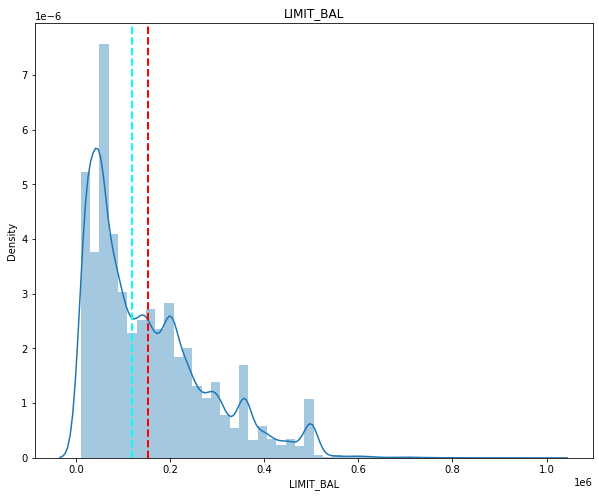

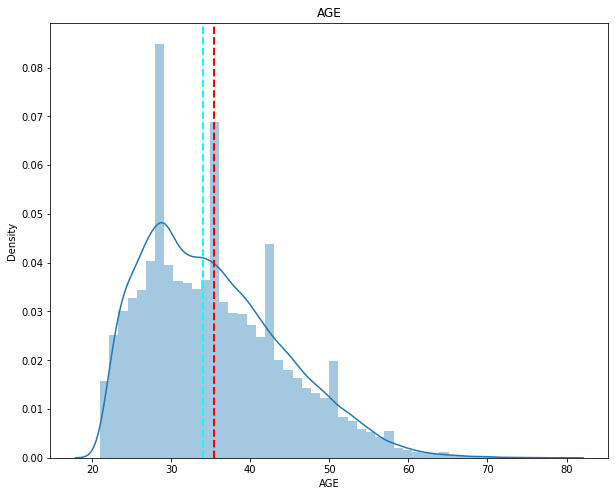

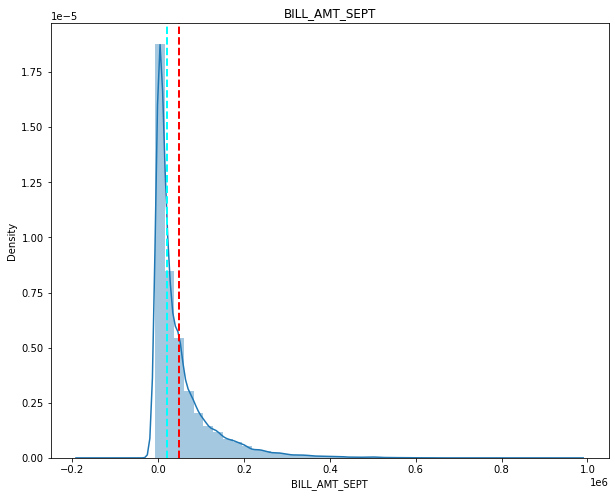

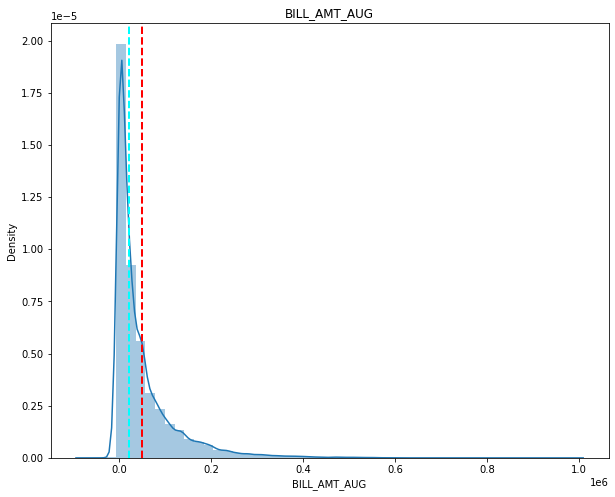

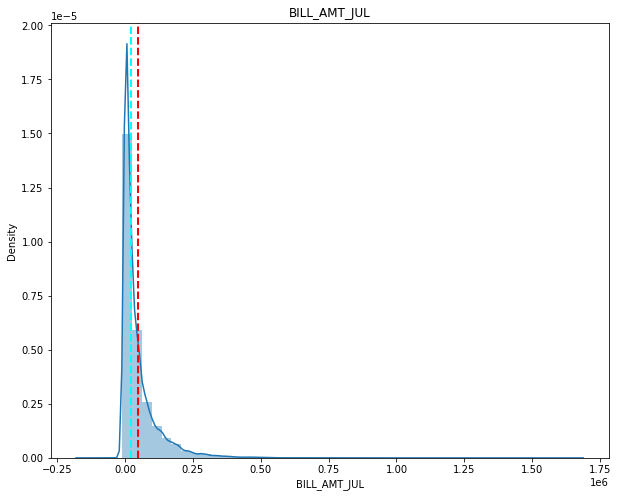

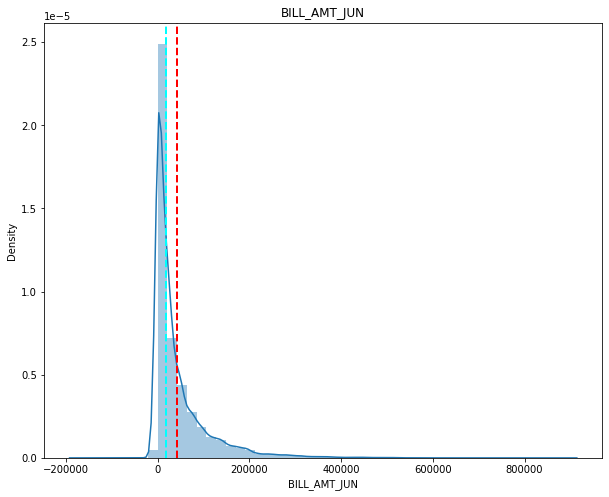

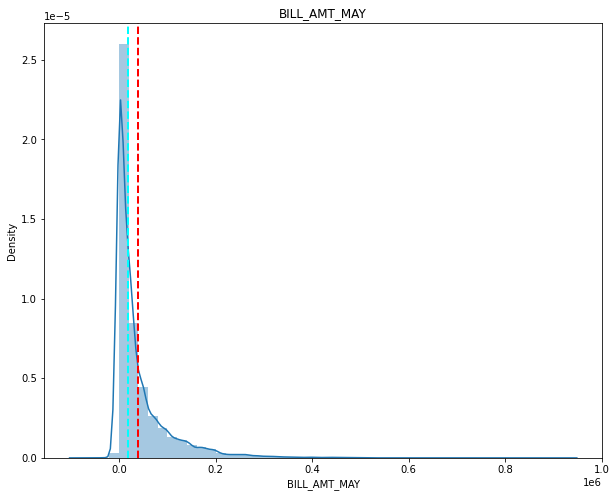

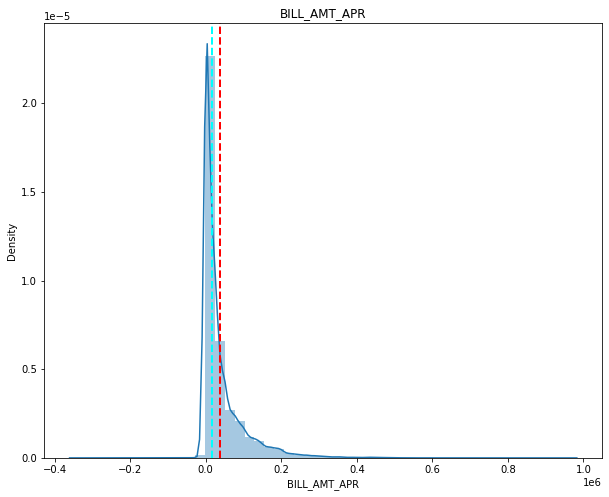

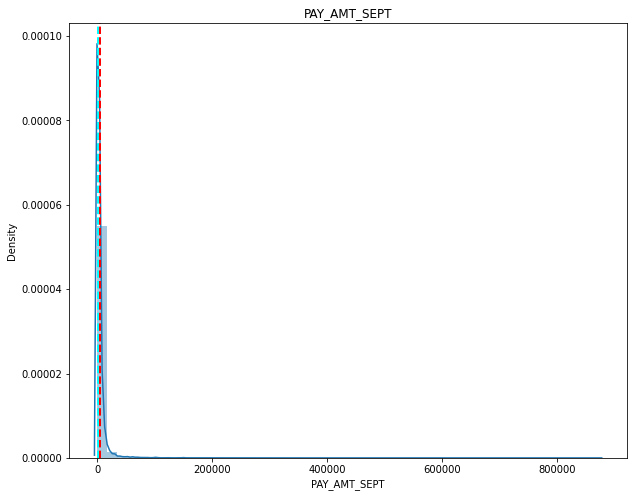

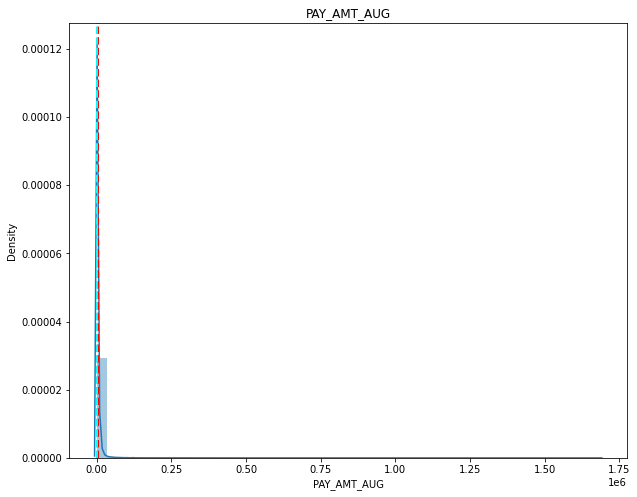

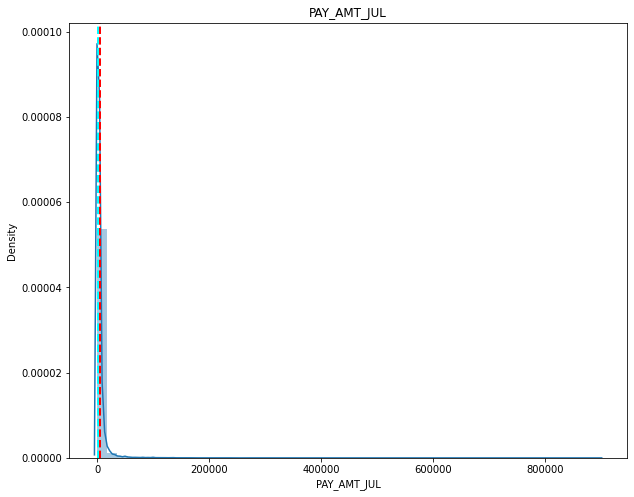

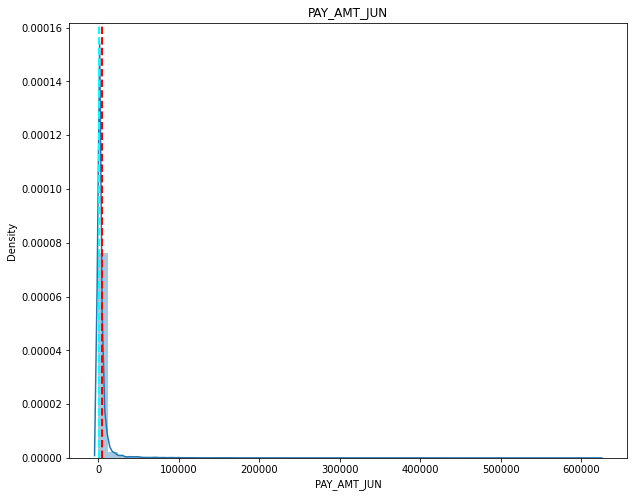

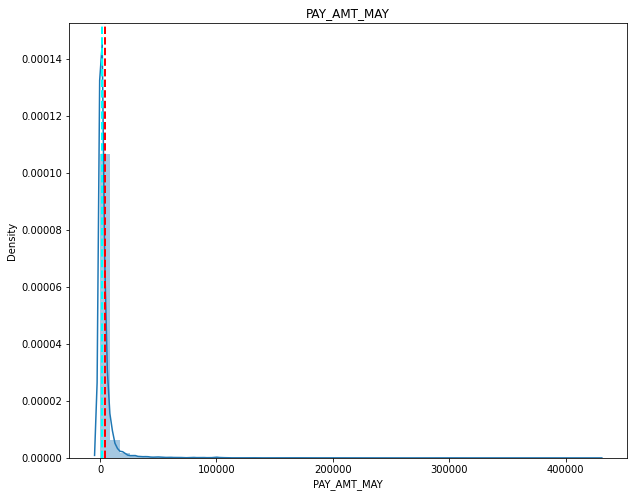

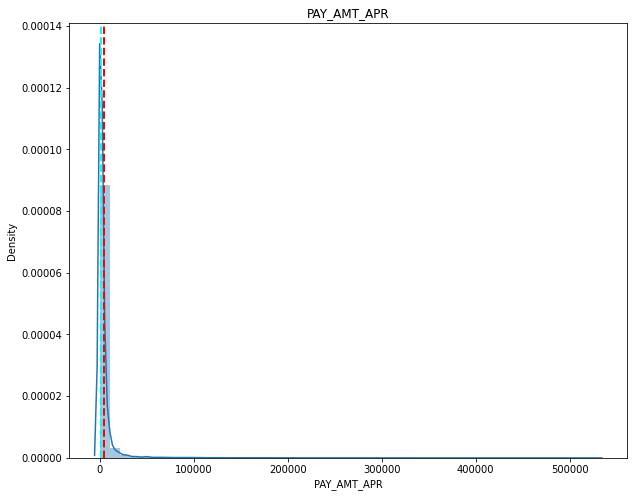

In [44]:
# seeing the distribution of features
transformation_feature = ['LIMIT_BAL','AGE','BILL_AMT_SEPT','BILL_AMT_AUG','BILL_AMT_JUL','BILL_AMT_JUN','BILL_AMT_MAY','BILL_AMT_APR','PAY_AMT_SEPT','PAY_AMT_AUG','PAY_AMT_JUL','PAY_AMT_JUN','PAY_AMT_MAY','PAY_AMT_APR']
for col in transformation_feature:
  fig = plt.figure(figsize = (10,8))
  ax = fig.gca()
  feature = (fe_df[col])
  sns.distplot(feature, ax=ax)
  ax.axvline(feature.mean(), color='red', linestyle='dashed', linewidth=2)
  ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
  ax.set_title(col)
plt.show()

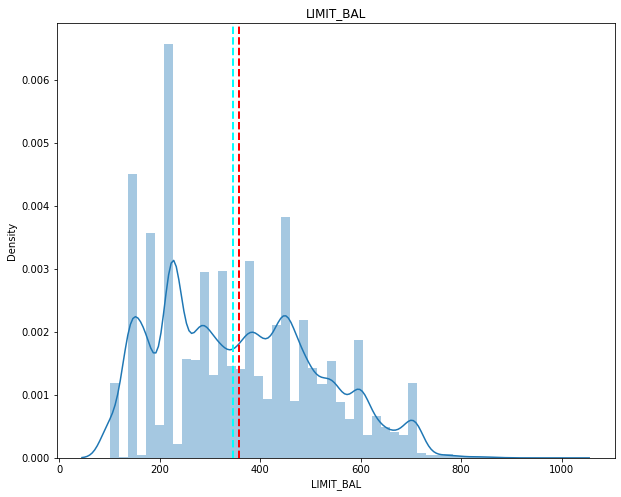

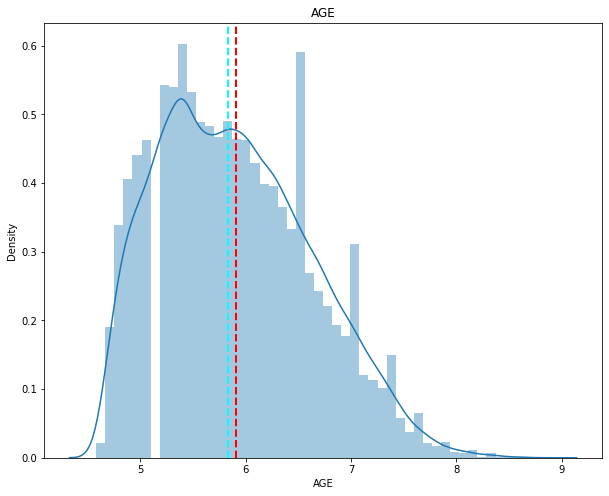

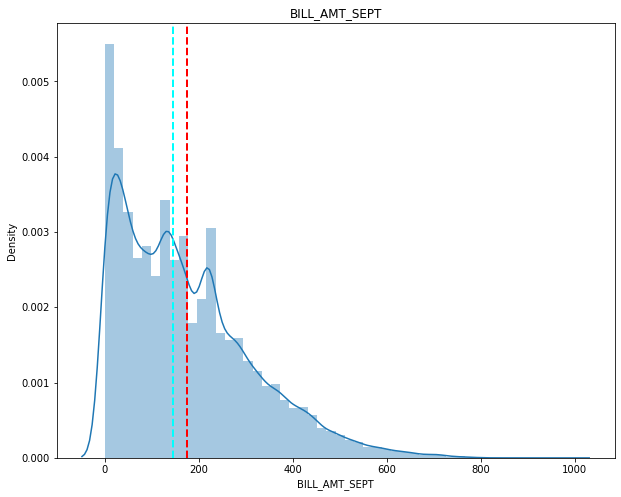

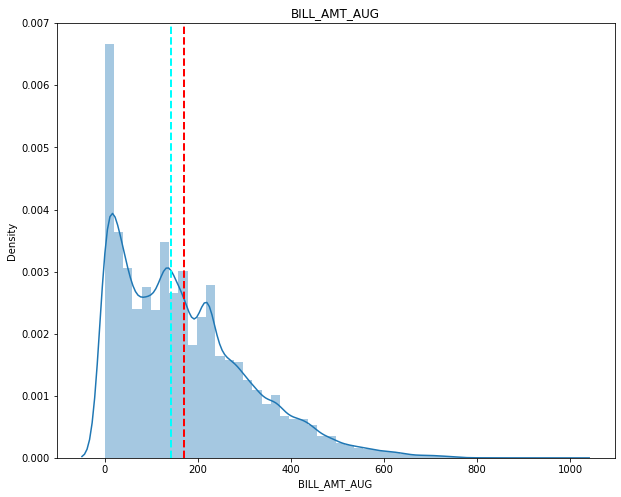

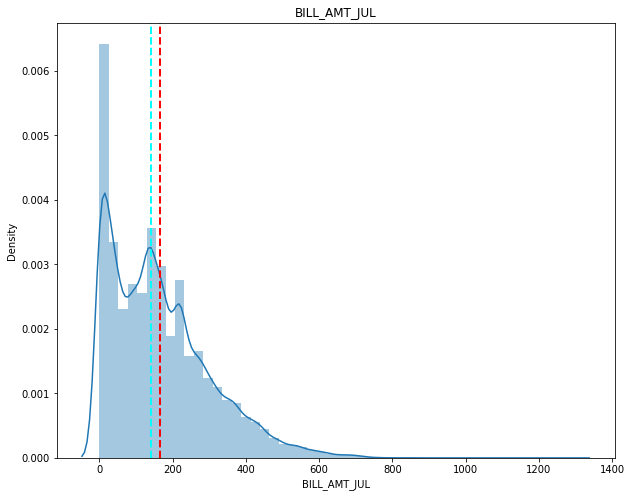

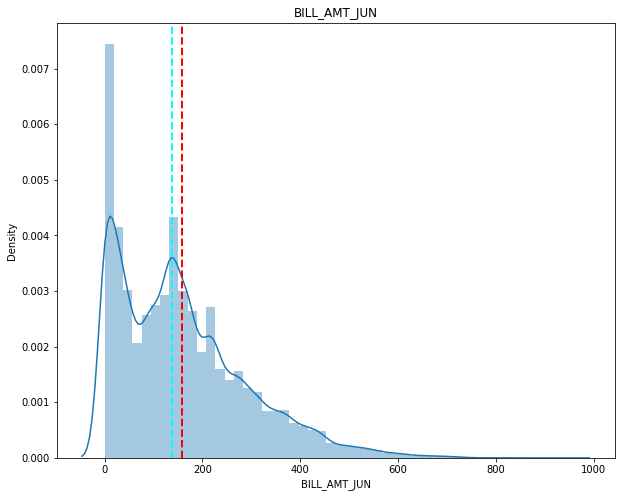

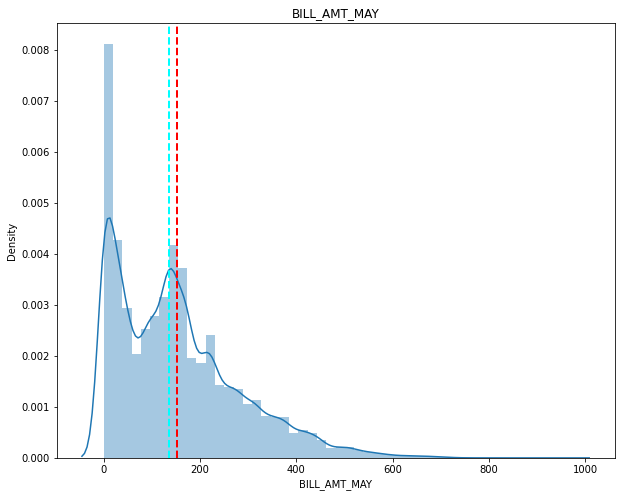

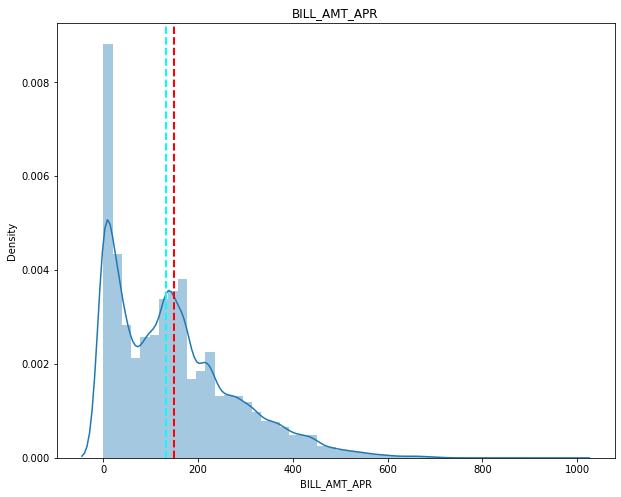

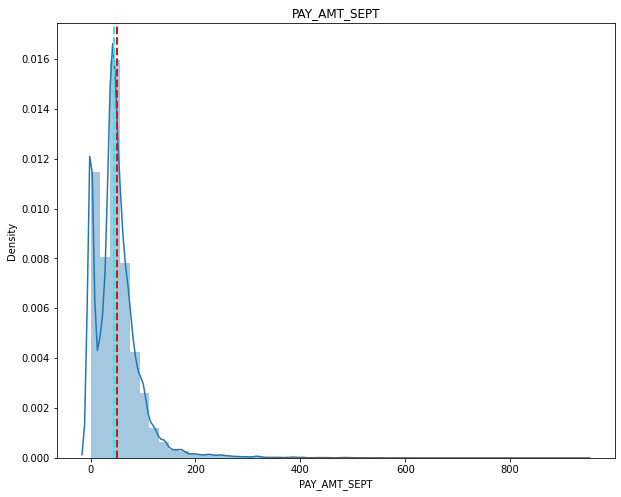

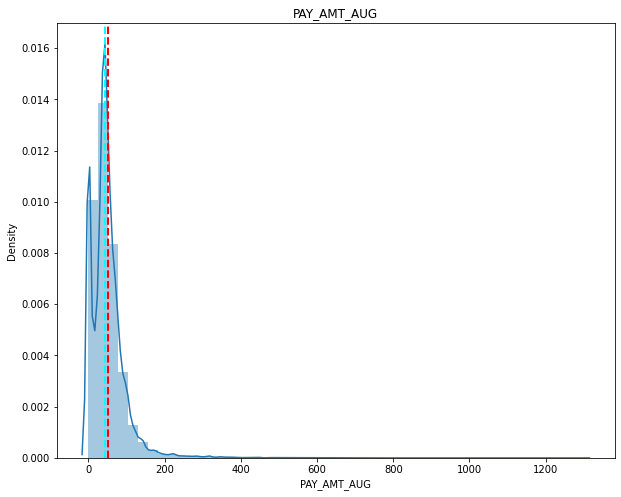

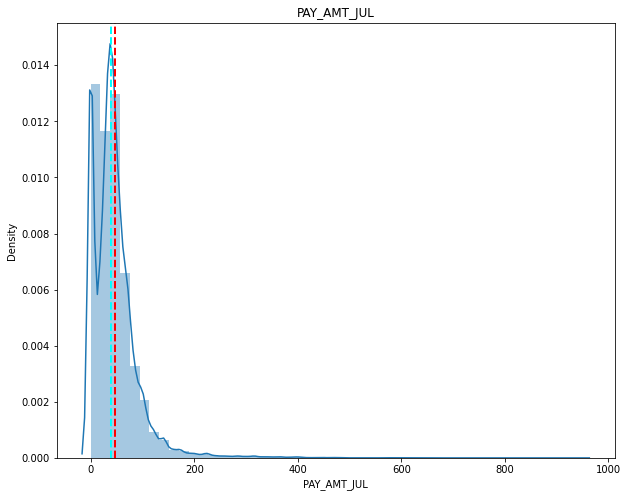

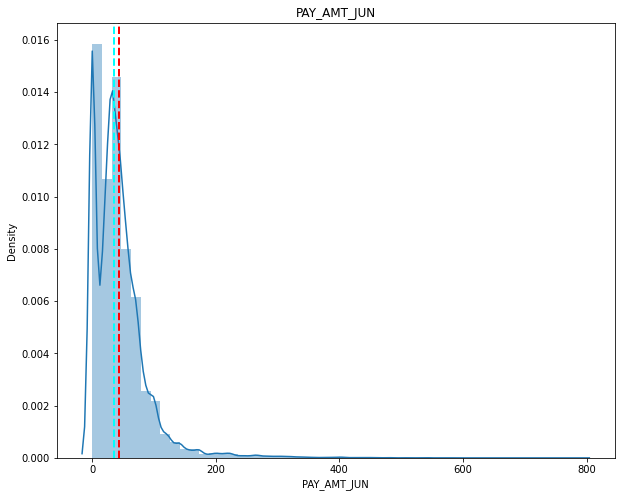

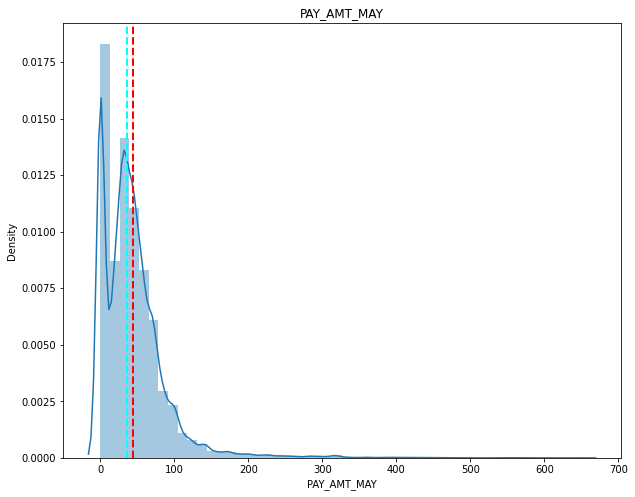

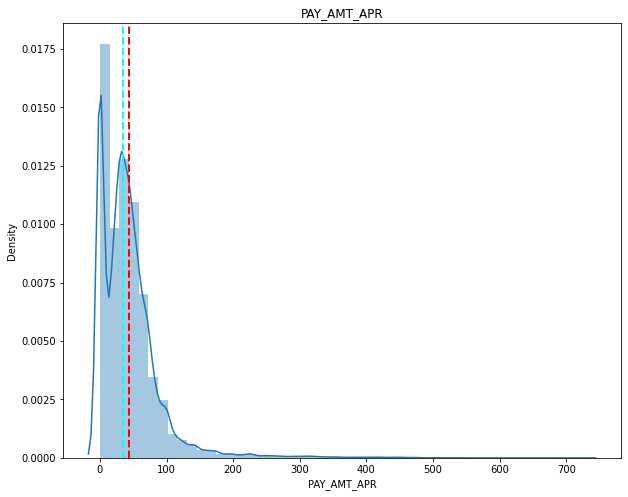

In [45]:
# applyng sqrt tranasformation on selected columns
for col in transformation_feature:
  fig = plt.figure(figsize = (10,8))
  ax = fig.gca()
  feature = np.sqrt(np.sqrt(fe_df[col]**2))
  sns.distplot(feature, ax=ax)
  ax.axvline(feature.mean(), color='red', linestyle='dashed', linewidth=2)
  ax.axvline(np.median(feature), color='cyan', linestyle='dashed', linewidth=2)    
  ax.set_title(col)
plt.show()

In [46]:
fe_df[transformation_feature] = np.sqrt(np.sqrt(fe_df[transformation_feature]**2))
fe_df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_SEPT                      0
PAY_AUG                       0
PAY_JUL                       0
PAY_JUN                       0
PAY_MAY                       0
PAY_APR                       0
BILL_AMT_SEPT                 0
BILL_AMT_AUG                  0
BILL_AMT_JUL                  0
BILL_AMT_JUN                  0
BILL_AMT_MAY                  0
BILL_AMT_APR                  0
PAY_AMT_SEPT                  0
PAY_AMT_AUG                   0
PAY_AMT_JUL                   0
PAY_AMT_JUN                   0
PAY_AMT_MAY                   0
PAY_AMT_APR                   0
default payment next month    0
total_payment                 0
overall_due                   0
dtype: int64

In [47]:
fe_df = fe_df.drop(["ID"],axis =1)

In [48]:
# appling one hot encoding to categorical columns
fe_df = pd.get_dummies(data=fe_df,columns = ['EDUCATION','MARRIAGE','PAY_SEPT','PAY_AUG','PAY_JUL','PAY_JUN','PAY_MAY','PAY_APR'],drop_first=True)


In [49]:
fe_df.head()

,LIMIT_BAL,SEX,AGE,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,...,PAY_APR_-1,PAY_APR_0,PAY_APR_1,PAY_APR_2,PAY_APR_3,PAY_APR_4,PAY_APR_5,PAY_APR_6,PAY_APR_7,PAY_APR_8
0,141.421356,0,4.898979,62.553977,55.695601,26.248809,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
1,346.410162,0,5.099020,51.788030,41.533119,51.788030,57.201399,58.779248,57.105166,0.000000,...,0,0,0,1,0,0,0,0,0,0
2,300.000000,0,5.830952,170.994152,118.435637,116.443119,119.712155,122.262014,124.695629,38.961519,...,0,1,0,0,0,0,0,0,0,0
3,223.606798,0,6.082763,216.771769,219.620127,222.015765,168.267644,170.173441,171.892408,44.721360,...,0,1,0,0,0,0,0,0,0,0
4,223.606798,1,7.549834,92.827798,75.299402,189.301347,144.706600,138.369072,138.314858,44.721360,...,0,1,0,0,0,0,0,0,0,0


appling ML models to the dataset as it is ready iam soing it with the pipeline calss of sklearn

In [50]:
# importing all the required modules
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_curve, accuracy_score, roc_auc_score, classification_report

**Implementing Logistic regression** 

In [51]:
fe_df = fe_df.drop(["overall_due","total_payment"],axis=1)
cols = list(fe_df.columns)
cols.remove(("default payment next month"))

In [52]:
X = fe_df[cols]
y = fe_df["default payment next month"]

In [53]:
fe_df.isnull().sum()

LIMIT_BAL        0
SEX              0
AGE              0
BILL_AMT_SEPT    0
BILL_AMT_AUG     0
                ..
PAY_APR_4        0
PAY_APR_5        0
PAY_APR_6        0
PAY_APR_7        0
PAY_APR_8        0
Length: 81, dtype: int64

In [54]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify = y)

In [55]:
# creating the pipeline for all the models
pipe_lr = Pipeline([('scl', StandardScaler()),
                    ('LR', LogisticRegression(random_state=42))])
pipe_lsvm  = Pipeline([('scl',StandardScaler()),
                      ('LSVM',LinearSVC(random_state=42))])
pipe_dt = Pipeline([('scl', StandardScaler()),
                    ('DT',DecisionTreeClassifier(random_state=42))])
pipe_rf = Pipeline([('scl', StandardScaler()),
                    ('RF',RandomForestClassifier(random_state=42))])
pipe_knn = Pipeline([('scl', StandardScaler()),
                    ('KNN', KNeighborsClassifier())])
pipe_svm = Pipeline([('scl', StandardScaler()),
                     ('SVM',SVC(random_state=42))])
pipe_xgb = Pipeline([('scl', StandardScaler()),
                     ('XGB', XGBClassifier(random_state=42))])
pipe_adaboost = Pipeline([('scl',StandardScaler()),
                          ('ADB',AdaBoostClassifier(random_state=42))])
pipe_naive_bayes  = Pipeline([('scl',StandardScaler()),
                      ('nive_bayes',GaussianNB())])
pipe_neural_clf  = Pipeline([('scl',StandardScaler()),
                      ('MLP',MLPClassifier(random_state=42))])


In [56]:
pipes = [(pipe_lr,"logistic_regression"),
        (pipe_lsvm,"linear_svm"),
        (pipe_dt,"decisiopn_teree"),
        (pipe_rf,"random_forest"),
        (pipe_knn,"KNN"),
        (pipe_xgb,"XGboost"),
        (pipe_adaboost,"ada_boost"),
        (pipe_naive_bayes,"niave_bayes"),
        (pipe_neural_clf,"neural_clf")]

In [57]:
(pipe_lsvm.steps[1][0] == "LR") or (pipe_lsvm.steps[1][0] =='LSVM')


True

In [77]:
import time
def model_apply(model_name,pipe,X_train, X_test, y_train, y_test):
    evaluation = {}
    evaluation["Name"] = model_name
    start = time.time()
    pipe.fit(X_train,y_train)
    end = time.time()
    y_test_pred = pipe.predict(X_test)
    y_train_pred = pipe.predict(X_train)
    model_grid_search_time = end-start
    evaluation["Training_Time"] = model_grid_search_time
    evaluation["Training Accuracy"] =  accuracy_score(y_train,y_train_pred)
    evaluation["Testing Accuracy"] = accuracy_score(y_test,y_test_pred)
    evaluation["Recall Score"] = recall_score(y_test,y_test_pred)
    evaluation["Precison"] = precision_score(y_test,y_test_pred)
    evaluation["F1score"] = f1_score(y_test,y_test_pred)
    evaluation["roc-auc score"] = roc_auc_score(y_test,y_test_pred)
    feature_imp = {}
    feature_imp["Feature"] = list(X_train.columns)
    if (pipe.steps[1][0] == "LR") or (pipe.steps[1][0] =='LSVM') or (pipe.steps[1][0] =='KNN') or (pipe.steps[1][0] =='nive_bayes'):
      feature_imp["Feature Importance"] = "---"
    else:
      feature_imp["Feature Importance"] = pipe.steps[1][1].feature_importances_
    
    clf_report = classification_report(y_test,y_test_pred)
    return clf_report, evaluation, feature_imp
 

In [71]:
clf_report, data, feature_imp_data = model_apply("dt",pipe_dt,X_train, X_test, y_train, y_test)

In [73]:
pd.DataFrame(feature_imp_data)

,Feature,Feature Importance
0,LIMIT_BAL,0.066662
1,SEX,0.036157
2,AGE,0.054951
3,BILL_AMT_SEPT,0.056744
4,BILL_AMT_AUG,0.036466
...,...,...
75,PAY_APR_4,0.000163
76,PAY_APR_5,0.000000
77,PAY_APR_6,0.000000
78,PAY_APR_7,0.000048


In [78]:
# param_grid = {'penalty':['l2'], 'C' : [0.001, 0.01, 0.1, 1, 10,100,1000] ,"max_iter":[100,500,700]}
# lr_grid = GridSearchCV(LogisticRegression(),param_grid=param_grid,scoring = 'recall', n_jobs = -1, verbose = 3, cv = 3)
framing_data = []
clf_data = []
feature_data = []
for pipe, model_name in pipes:
  clf_report, data, feature_imp_data = model_apply(model_name,pipe,X_train, X_test, y_train, y_test)
  framing_data.append(data)
  clf_data.append(clf_report)
  feature_data.append(feature_imp_data)
framing_data

AttributeError: ignored

In [67]:
feature_data

[{'Feature': ['LIMIT_BAL',
   'SEX',
   'AGE',
   'BILL_AMT_SEPT',
   'BILL_AMT_AUG',
   'BILL_AMT_JUL',
   'BILL_AMT_JUN',
   'BILL_AMT_MAY',
   'BILL_AMT_APR',
   'PAY_AMT_SEPT',
   'PAY_AMT_AUG',
   'PAY_AMT_JUL',
   'PAY_AMT_JUN',
   'PAY_AMT_MAY',
   'PAY_AMT_APR',
   'EDUCATION_2',
   'EDUCATION_3',
   'EDUCATION_4',
   'MARRIAGE_2',
   'MARRIAGE_3',
   'PAY_SEPT_-1',
   'PAY_SEPT_0',
   'PAY_SEPT_1',
   'PAY_SEPT_2',
   'PAY_SEPT_3',
   'PAY_SEPT_4',
   'PAY_SEPT_5',
   'PAY_SEPT_6',
   'PAY_SEPT_7',
   'PAY_SEPT_8',
   'PAY_AUG_-1',
   'PAY_AUG_0',
   'PAY_AUG_1',
   'PAY_AUG_2',
   'PAY_AUG_3',
   'PAY_AUG_4',
   'PAY_AUG_5',
   'PAY_AUG_6',
   'PAY_AUG_7',
   'PAY_AUG_8',
   'PAY_JUL_-1',
   'PAY_JUL_0',
   'PAY_JUL_1',
   'PAY_JUL_2',
   'PAY_JUL_3',
   'PAY_JUL_4',
   'PAY_JUL_5',
   'PAY_JUL_6',
   'PAY_JUL_7',
   'PAY_JUL_8',
   'PAY_JUN_-1',
   'PAY_JUN_0',
   'PAY_JUN_1',
   'PAY_JUN_2',
   'PAY_JUN_3',
   'PAY_JUN_4',
   'PAY_JUN_5',
   'PAY_JUN_6',
   'PAY_JUN_7',
   

In [60]:
model_data_frame = pd.DataFrame(framing_data)
feature_imp_df = pd.DataFrame(feature_data)

In [61]:
model_data_frame

,Name,Training_Time,Training Accuracy,Testing Accuracy,Recall Score,Precison,F1score,roc-auc score
0,logistic_regression,0.935603,0.756285,0.755788,0.705058,0.784642,0.742724,0.755784
1,linear_svm,22.516939,0.755007,0.755204,0.695201,0.789978,0.739565,0.755200
2,decisiopn_teree,0.996383,0.999361,0.741003,0.753956,0.734893,0.744302,0.741003
3,random_forest,8.132584,0.999361,0.838013,0.803372,0.863155,0.832191,0.838011
4,KNN,0.063112,0.841345,0.769665,0.773541,0.767568,0.770543,0.769665
5,XGboost,7.082643,0.776631,0.774463,0.708042,0.816482,0.758405,0.774459
6,ada_boost,4.662654,0.758457,0.761753,0.724643,0.782712,0.752559,0.761751
7,niave_bayes,0.079740,0.633788,0.635108,0.285344,0.949504,0.438815,0.635085
8,neural_clf,75.349472,0.835085,0.778095,0.783917,0.774872,0.779368,0.778095


In [62]:
feature_imp_df

,Feature,Feature Importance
0,"[LIMIT_BAL, SEX, AGE, BILL_AMT_SEPT, BILL_AMT_...",---
1,"[LIMIT_BAL, SEX, AGE, BILL_AMT_SEPT, BILL_AMT_...",---
2,"[LIMIT_BAL, SEX, AGE, BILL_AMT_SEPT, BILL_AMT_...",---
3,"[LIMIT_BAL, SEX, AGE, BILL_AMT_SEPT, BILL_AMT_...",---
4,"[LIMIT_BAL, SEX, AGE, BILL_AMT_SEPT, BILL_AMT_...",---
5,"[LIMIT_BAL, SEX, AGE, BILL_AMT_SEPT, BILL_AMT_...",---
6,"[LIMIT_BAL, SEX, AGE, BILL_AMT_SEPT, BILL_AMT_...",---
7,"[LIMIT_BAL, SEX, AGE, BILL_AMT_SEPT, BILL_AMT_...",---
8,"[LIMIT_BAL, SEX, AGE, BILL_AMT_SEPT, BILL_AMT_...",---


In [63]:
a = list(model_data_frame["Name"])
c = 0
for i in clf_data:
  print(a[c])
  print(i)
  c = c+1

logistic_regression
              precision    recall  f1-score   support

           0       0.73      0.81      0.77      7711
           1       0.78      0.71      0.74      7710

    accuracy                           0.76     15421
   macro avg       0.76      0.76      0.76     15421
weighted avg       0.76      0.76      0.76     15421

linear_svm
              precision    recall  f1-score   support

           0       0.73      0.82      0.77      7711
           1       0.79      0.70      0.74      7710

    accuracy                           0.76     15421
   macro avg       0.76      0.76      0.75     15421
weighted avg       0.76      0.76      0.75     15421

decisiopn_teree
              precision    recall  f1-score   support

           0       0.75      0.73      0.74      7711
           1       0.73      0.75      0.74      7710

    accuracy                           0.74     15421
   macro avg       0.74      0.74      0.74     15421
weighted avg       0.74    

In [64]:
lr_param_grid = [{'LR__penalty':['l1','l2'], 'LR__C' : [0.001, 0.01, 0.1, 1, 10,100] ,"LR__max_iter":[100,500,]}]
SVM_param_grid = [{'SVM__C': [0.1, 1, 10, 100, 1000], 
                    'SVM__gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                    'SVM__kernel': ['rbf']}]
mlp_param_grid=[{
    'MLP__hidden_layer_sizes': [(10,30,10),(20,)],
    'MLP__activation': ['tanh', 'relu'],
    'MLP__solver': ['sgd', 'adam'],
    'MLP__alpha': [0.0001, 0.05],
    'MLP__learning_rate': ['constant','adaptive'],
}]
dt_param_grid  =  [{
                    'DT__min_samples_leaf': [1, 2, 3,5,10,15],
                    'DT__max_depth': [1, 2,15,30,40,50]
}]
rf_param_grid = [{ 
            "RF__max_features"      : ["auto", "sqrt", "log2"],
            "RF__min_samples_split" : [1,2],
            "RF__bootstrap": [True, False],
  
            }]
xgb_param_grid = [{ 
            "XGB__max_features"      : ["auto", "sqrt", "log2"],
            "XGB__min_samples_split" : [2,4,8],
            "XGB__bootstrap": [True, False],
  
            }]

adb_param_grid = [{ 
           
            "ADB__max_features"      : ["auto", "sqrt", "log2"],
            "ADB__min_samples_split" : [2,4,8],
            "ADB__bootstrap": [True, False],
  
            }]

knn_param_grid = [{ 'KNN__n_neighbors' : [5,7,9,11,13,15],
                    'KNN__weights' : ['uniform','distance']
                    }]



**Hyper parameter tuning for random forest**

In [65]:
random_forest = GridSearchCV(pipe_rf,param_grid=rf_param_grid,scoring="recall",cv=3,verbose=3,n_jobs=-1)


In [66]:
random_forest.fit(X_train,y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


KeyboardInterrupt: ignored

In [ ]:
random_forest.best_params_

In [ ]:
y_pred_rf = random_forest.predict(X_test)

In [ ]:
print(classification_report(y_test,y_pred_rf))

In [ ]:
def plot_roc_curve(y_test,y_pred,model_name:str,label=None):
  fpr,tpr,threshold = roc_curve(y_test,y_pred)
  score = roc_auc_score(y_test,y_pred)
  print(f"ROC-AUC-SCORE : {score}")
  plt.plot(fpr,tpr,linewidth=2,label=label)
  plt.plot([0,1],[0,1],'k--')
  plt.title("rov -auc curve {}".format(model_name))
  plt.xlabel("FPR")
  plt.ylabel("TPR")
  plt.show()
  print(threshold)

In [ ]:
plot_roc_curve(y_test,y_pred_rf,"Random Forest")

In [ ]:
def plottting_confusion_matrix(y_test, y_pred): 
  cm = confusion_matrix(y_test, y_pred)
  ax= plt.subplot()
  sns.heatmap(cm, annot=True, fmt='g', ax=ax)
  ax.set_xlabel('Predicted labels')
  ax.set_ylabel('True labels')
  ax.set_title('Confusion Matrix')
  ax.xaxis.set_ticklabels([0, 1])
  ax.yaxis.set_ticklabels([0, 1])
  plt.show()

In [ ]:
plottting_confusion_matrix(y_test, y_pred_rf)

**Hyperparameter tuning for logistic Regression**

In [ ]:
logistic_regression = GridSearchCV(pipe_lr,param_grid=lr_param_grid,cv=3,n_jobs=-1,scoring="recall")

In [ ]:
logistic_regression.fit(X_train,y_train)

In [ ]:
logistic_regression.best_params_

In [ ]:
y_pred_lr = logistic_regression.predict(X_test)

In [ ]:
print(classification_report(y_test,y_pred_lr))

In [ ]:
plot_roc_curve(y_test,y_pred_lr,"logistic_regression")

In [ ]:
plottting_confusion_matrix(y_test,y_pred_lr)

**Decision tree hyper parameter tuning**

In [ ]:
dt = GridSearchCV(pipe_dt,param_grid=dt_param_grid,cv=3,n_jobs=-1,scoring="recall")

In [ ]:
dt.fit(X_train,y_train)

In [ ]:
dt.best_estimator_

In [ ]:
y_pred_dt = dt.predict(X_test)

In [ ]:
print(classification_report(y_test,y_pred_dt))

In [ ]:
plot_roc_curve(y_test,y_pred_dt,"Decision_Tree")

In [ ]:
plottting_confusion_matrix(y_test,y_pred_dt)